In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from states import states_dict

# Glassdoor data
glassdoor_data_path = "Cleaned data/Data_related_jobs_glassdoor.csv"

# Import data while escaping encoding irregularities
glassdoor_df = pd.read_csv(glassdoor_data_path, encoding_errors="backslashreplace")
glassdoor_df.columns

Index(['company', 'job title', 'location', 'job description',
       'salary estimate', 'company_size', 'company_type', 'company_sector',
       'company_industry', 'company_founded', 'company_revenue', 'hourly',
       'rating', 'python_yn', 'spark_yn', 'azure_yn', 'aws_yn', 'excel_yn',
       'machine_learning_yn', 'job_simpl', 'seniority', 'description_len',
       'company_age'],
      dtype='object')

In [2]:
glassdoor_df.head()

,company,job title,location,job description,salary estimate,company_size,company_type,company_sector,company_industry,company_founded,...,python_yn,spark_yn,azure_yn,aws_yn,excel_yn,machine_learning_yn,job_simpl,seniority,description_len,company_age
0,Microsoft,Data & Applied Scientist,"Redmond, WA",Microsoft 365 is a key part of the company\x92...,123486,10000+ Employees,Company - Public,Information Technology,Computer Hardware Development,1975.0,...,1,0,0,1,0,1,data scientist,junior,359,47.0
1,UT Southwestern Medical Center,Data Scientist or Bioinformatician (remote),Remote,Center Information:\nThe Quantitative Biomedic...,93500,10000+ Employees,Hospital,Healthcare,Health Care Services & Hospitals,1943.0,...,1,0,0,0,0,1,data scientist,mid,267,79.0
2,Notion,"Data Scientist, Growth","New York, NY",About Us:\nWe're on a mission to make it possi...,137853,201 to 500 Employees,Company - Private,Information Technology,Enterprise Software & Network Solutions,2016.0,...,1,0,0,0,0,0,data scientist,Senior,589,6.0
3,Net2Aspire,Jr. Data Scientist,Remote,? Apply Statistical and Machine Learning metho...,72500,Unknown,Company - Public,NaN,NaN,NaN,...,0,0,0,0,0,1,data scientist,junior,132,NaN
4,Ntropy Network,Data Scientist,Remote,"Over the last few decades, technological innov...",155000,1 to 50 Employees,Company - Private,NaN,NaN,NaN,...,1,0,0,1,0,0,data scientist,mid,522,NaN


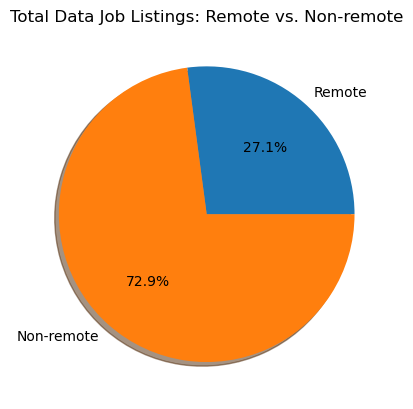

In [23]:
# Figure out how what portion of jobs are remote
remote_count = glassdoor_df[glassdoor_df["location"]=="Remote"].count()["location"]
non_remote_count = glassdoor_df.count()["location"] - remote_count

remote_prop_df = pd.DataFrame({
    "Total Jobs": [remote_count, non_remote_count]
}, index=["Remote", "Non-remote"])

# Plot a pie chart
#remote_prop_df.plot.pie(y = "Total Jobs")

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(remote_prop_df["Total Jobs"], labels=remote_prop_df.index, autopct="%1.1f%%", shadow=True)
plt.title("Total Data Job Listings: Remote vs. Non-remote")
plt.savefig('figures/gd_figure1.png')
plt.show()

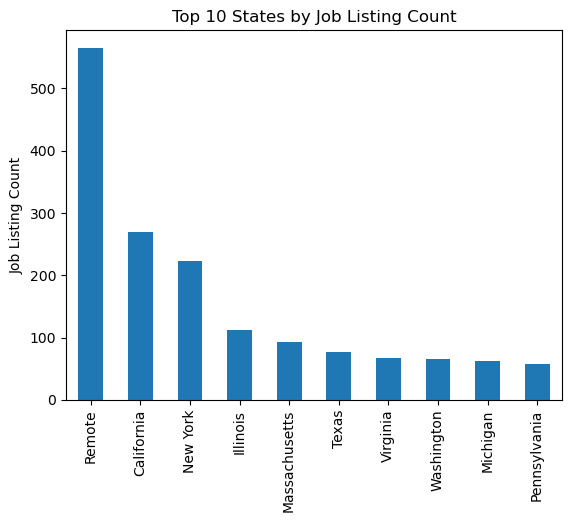

In [24]:
# Make a column that contains either the state that a job is located in or "Remote" if the job is remote, removing the city

# Function that pulls out just the state from a city+state string, and normalizes to full state name if abbreviated
def just_the_state(city):
    split_up = city.split(", ")
    if len(split_up) > 1:
        state = split_up[1]
    else:
        state = split_up[0]
    if state in states_dict:
        return states_dict[state]
    else:
        return state
    
# Create the new column
ax = glassdoor_df["State"] = glassdoor_df["location"].apply(just_the_state)

# Find the top states by job count and make a bar chart with the 10 highest values
state_job_counts = glassdoor_df["State"].value_counts()
state_job_counts[:10].plot.bar()
plt.title("Top 10 States by Job Listing Count")
plt.ylabel("Job Listing Count")
plt.savefig('figures/gd_figure2.png')
plt.show()

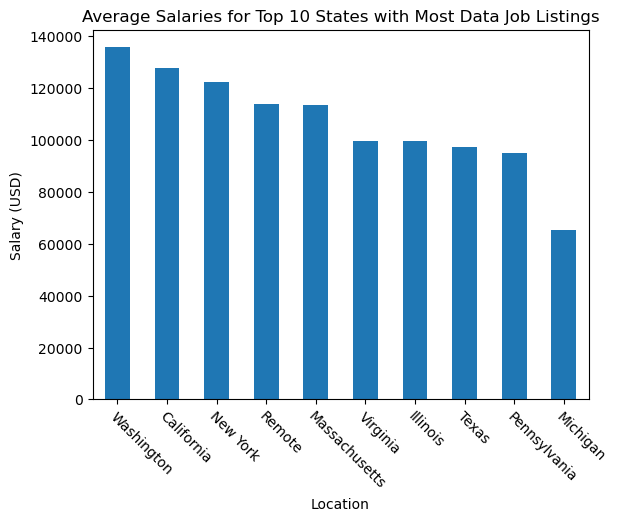

In [25]:
# Find the top paying states in the 10 states with the most jobs

# Filter the full DataFrame to just the 10 states we found the most jobs in in the previous step
most_jobs_states_df = glassdoor_df[glassdoor_df["State"].isin(state_job_counts[:10].index)]

# Find the average salary in those states, sort by that salary, and make a bar chart
ax = most_jobs_states_df.groupby("State").mean()["salary estimate"].sort_values(ascending=False).plot.bar()

plt.title("Average Salaries for Top 10 States with Most Data Job Listings")
plt.ylabel("Salary (USD)")
plt.xlabel("Location")
plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
plt.savefig('figures/gd_figure3.png')
plt.show()